# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Akhmad Mustolih
- **Email:**
 mc229d5y0444@student.devacademy.id
- **ID Dicoding:** MC229D5Y0444

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren umum penyewaan sepeda dari waktu ke waktu?
2. Bagaimana penyewaan sepeda bervariasi menurut jam dalam sehari?
3. Apa dampak cuaca terhadap penyewaan sepeda?
4. Bagaimana penyewaan sepeda berbeda di setiap musim?
5. Apa hubungan utama antara berbagai variabel dalam kumpulan data?

## Import Semua Packages/Library yang Digunakan


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [64]:
    df_day = pd.read_csv('/day.csv')
    df_hour = pd.read_csv('/hour.csv')
    display(df_day.head())
    display(df_hour.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Data yang ditampilkan cuma 5 baris pertama sesuai gambar diatas. data diatas adalah  dataset yang akan digunakan untuk menilai kualitas datanya.Tabel diatas berisi data berikut :

- hour.csv: Data penyewaan sepeda per jam (17.379 data).
- day.csv: Data penyewaan sepeda per hari (731 data).


### Assessing Data

In [65]:
print("\ndf_day info:")
df_day.info()
print("Jumlah duplikasi day.csv:", df_day.duplicated().sum())
df_day.describe()


df_day info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi day.csv: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- `dteday      17379 non-null  object` type data salah,
 Dataset `df_day` tidak memiliki nilai yang hilang, sehingga datanya lengkap. Namun, terdapat kesalahan dalam tipe data pada kolom `dteday `. Pada kolom ini seharusnya memiliki tipe data `datetime`, bukan `object`, yang biasanya digunakan untuk data berbentuk string.

In [66]:
print("\ndf_hour info:")
df_hour.info()
print("Jumlah duplikasi hour.csv:", df_hour.duplicated().sum())
df_hour.describe()


df_hour info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi hour.csv: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- `dteday      17379 non-null  object` type data salah,
 Dataset `df_hour` tidak memiliki nilai yang hilang, sehingga datanya lengkap. Namun, terdapat kesalahan dalam tipe data pada kolom `dteday `. Pada kolom ini seharusnya memiliki tipe data `datetime`, bukan `object`, yang biasanya digunakan untuk data berbentuk string.

### Cleaning Data

In [67]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [68]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berdasarkan hasil proses assessing data, diketahui bahwa terdapat satu masalah yang dijumpai dalam `df_hour` dan `df_day`, yaitu kesalahan tipe data saja. Jadi pada tahap ini, masalah pada tahap assessing telah selesai.

## Exploratory Data Analysis (EDA)

In [69]:
#Cek data
print("\ndf_day info:")
df_day.info()
print("\ndf_hour info:")
df_hour.info()

# ringkasan data statistik
print("\ndf_day numerical summary statistics:\n", df_day.describe())
print("\ndf_hour numerical summary statistics:\n", df_hour.describe())

# Nilai Unik (Kolom Kategoris) - Contoh untuk beberapa kolom
categorical_cols_day = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
categorical_cols_hour = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']

for col in categorical_cols_day:
    print(f"\nUnique values in df_day for {col}:\n{df_day[col].value_counts()}")

for col in categorical_cols_hour:
    print(f"\nUnique values in df_hour for {col}:\n{df_hour[col].value_counts()}")


df_day info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime6

In [70]:
df_combined = pd.merge(df_day, df_hour, on='dteday', how='inner')
display(df_combined.head())

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1



**Insight**:
 Berikut struktur dan statistik dasar DataFrame `df_day` dan `df_hour` dengan memeriksa bentuknya, statistik ringkasan, dan nilai unik untuk kolom kategoris. Ini menunjukan informasi detail terkait jumlah orang yang menyewa sepeda berdasarkan kolom/jenis dan dataset. Kemudian data digabungkan untuk menjadi satu display dataset dan agar memudahkan untuk visualisasi datanya.

## Visualization & Explanatory Analysis

### 1. Bagaimana tren umum penyewaan sepeda dari waktu ke waktu?




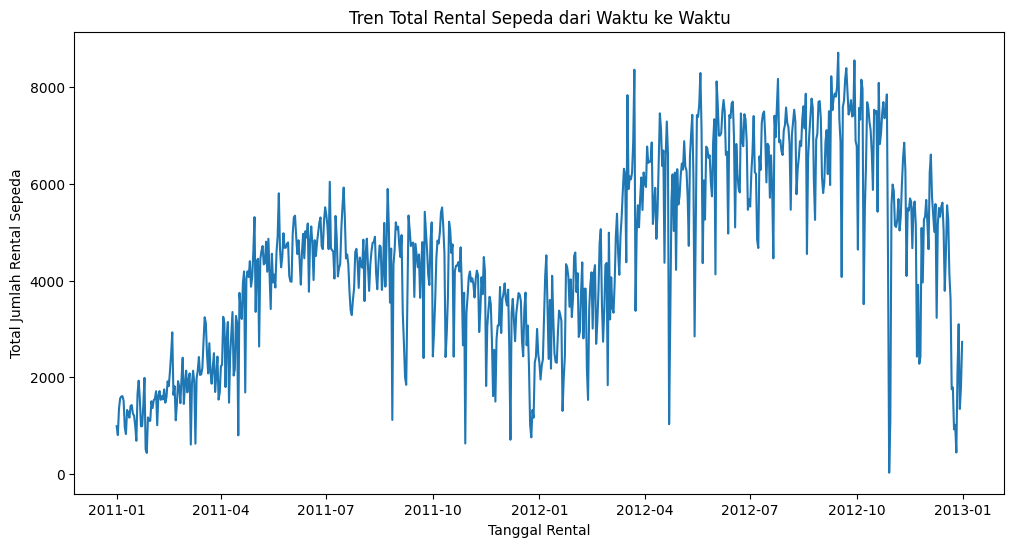

In [71]:
plt.figure(figsize=(12, 6))
plt.plot(df_combined['dteday'], df_combined['cnt_x'])
plt.xlabel('Tanggal Rental')
plt.ylabel('Total Jumlah Rental Sepeda')
plt.title('Tren Total Rental Sepeda dari Waktu ke Waktu')
plt.show()

**Insight:**
- Tren rental sepeda pada waktu ke waktu mengalami peingkatan. Pada pertengahan tahun 2011 dan pertengahan tahun 2012 terjadi lonjakan yang signifikan, akan tetapi pada setiap awal tahun mengalami penurunan. Ini dipengaruhi beberapa faktor, seperti musim, cuaca, dan waktu kerja juga.

###2. Bagaimana penyewaan sepeda bervariasi menurut jam dalam sehari?

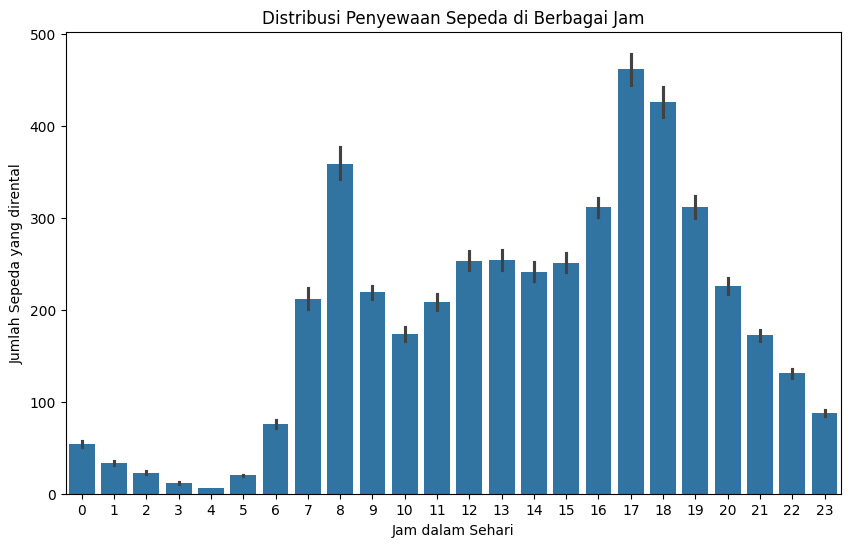

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt_y', data=df_combined)
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Sepeda yang dirental')
plt.title('Distribusi Penyewaan Sepeda di Berbagai Jam')
plt.show()

**Insight:**
- Berdasarkan grafik diatas, penyewaan sepeda dalam sehari meningkat pada jam-jam tertentu di pagi hari sekitar jam 7 - 9 pagi, pengguna sepeda sampai 400, dan melonjak sampai hampir 500 di waktu sore hari jam 17.00. Ini membuktikan penyewa sepeda sering merental di pagi dan sore hari.

###3. Apa dampak cuaca terhadap penyewaan sepeda?

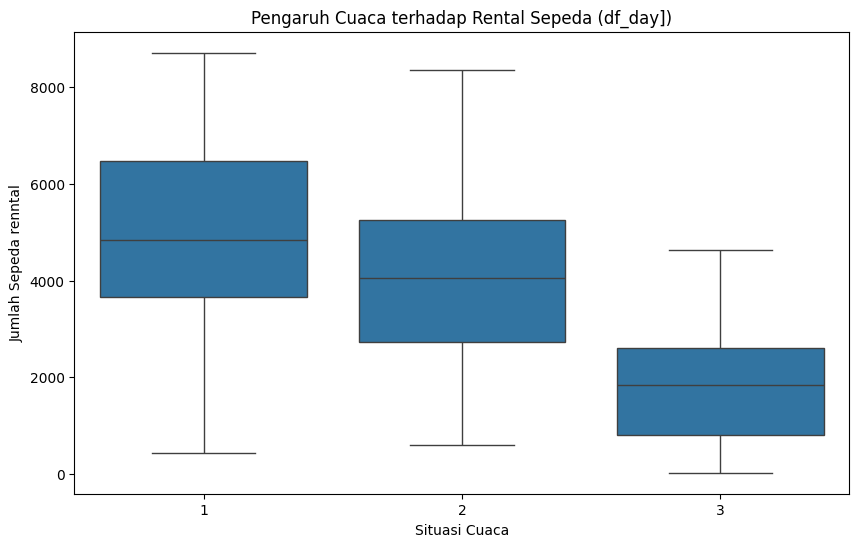

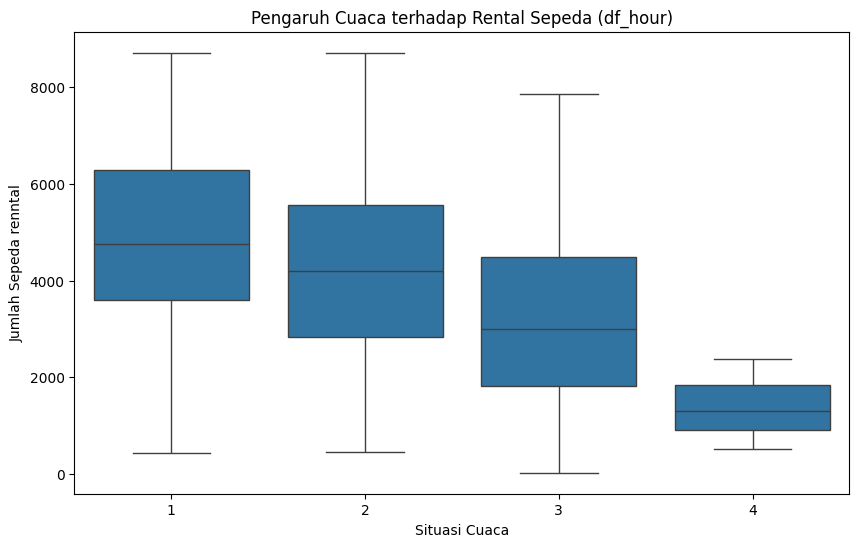

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit_x', y='cnt_x', data=df_combined)
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Sepeda renntal')
plt.title('Pengaruh Cuaca terhadap Rental Sepeda (df_day])')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit_y', y='cnt_x', data=df_combined)
plt.xlabel('Situasi Cuaca')
plt.ylabel('Jumlah Sepeda renntal')
plt.title('Pengaruh Cuaca terhadap Rental Sepeda (df_hour)')
plt.show()

**Insight:**
- cuaca(weathersit):
1.   Cerah, sedikit berawan, sebagian berawan
2.   Berkabut + berawan, berkabut + mendung terputus, berkabut + sedikit berawan
3.   Salju ringan, hujan ringan + badai petir + awan tersebar, hujan ringan +
     awan tersebar
4.   Hujan lebat + butiran es + badai petir + kabut, salju + kabut

- Berdasarkan data diatas cuaca cerah meniliki jumlah penyewa sepeda lebih banyak, dan saat kondisi cuaca tidak cerah jumlah penyewa menurun. nah di bloxpot cuaca nomor 4 presentase datanya sangat kecil.
- Oleh sebab itu, dapat disimpulkan bahwa cuaca menjadi faktor utama juga dalam tren naik turunnya jumlah penyewaan sepeda.

###4. Bagaimana penyewaan sepeda berbeda di setiap musim?

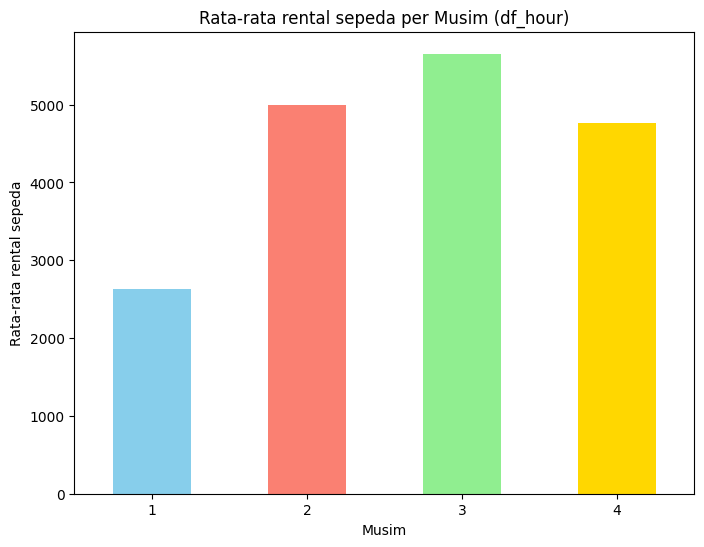

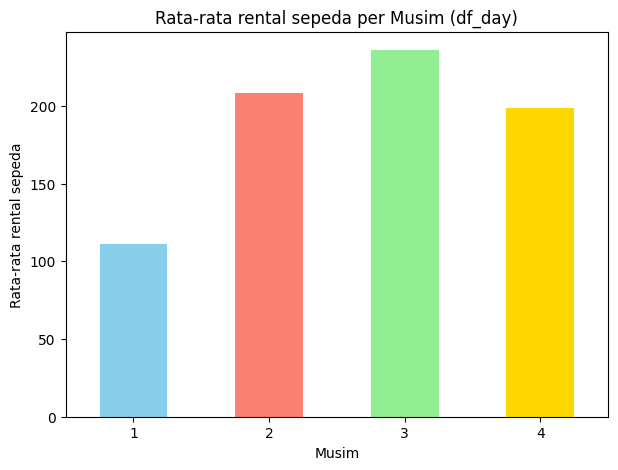

In [74]:
season_counts = df_combined.groupby('season_x')['cnt_x'].mean()
plt.figure(figsize=(8, 6))
season_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.xlabel('Musim')
plt.ylabel('Rata-rata rental sepeda')
plt.title('Rata-rata rental sepeda per Musim (df_hour)')
plt.xticks(rotation=0)
plt.show()
season_counts = df_combined.groupby('season_y')['cnt_y'].mean()
plt.figure(figsize=(7, 5))
season_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold'])
plt.xlabel('Musim')
plt.ylabel('Rata-rata rental sepeda')
plt.title('Rata-rata rental sepeda per Musim (df_day)')
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Musim (season):
1. musim semi,
2. musim panas,
3. musim gugur,
4. musim dingin
- Berdasarkan data diatas, pada musim gugur jumlah penyewaan sepeda paling banyak dibanding musim lain. ini membuktikan data tren rental sepeda sebelumnya benar, karena mengalami lonjakan di pertengahan tahun , bulan juni- November dimana ini terjadi pada musim panas dan musim gugur.
- oleh karena itu, kenapa setiap musim berbeda , dikarenakan setiap musim memiliki kondisi tersendiri yang sesuai untuk menyewa sepeda, misal musim gugur saat bersepeda kita bisa menikmati daun-daun berguguran di sore hari dengan nyaman dan kondisi lainnya.


###5. Apa hubungan utama antara berbagai variabel dalam kumpulan data?

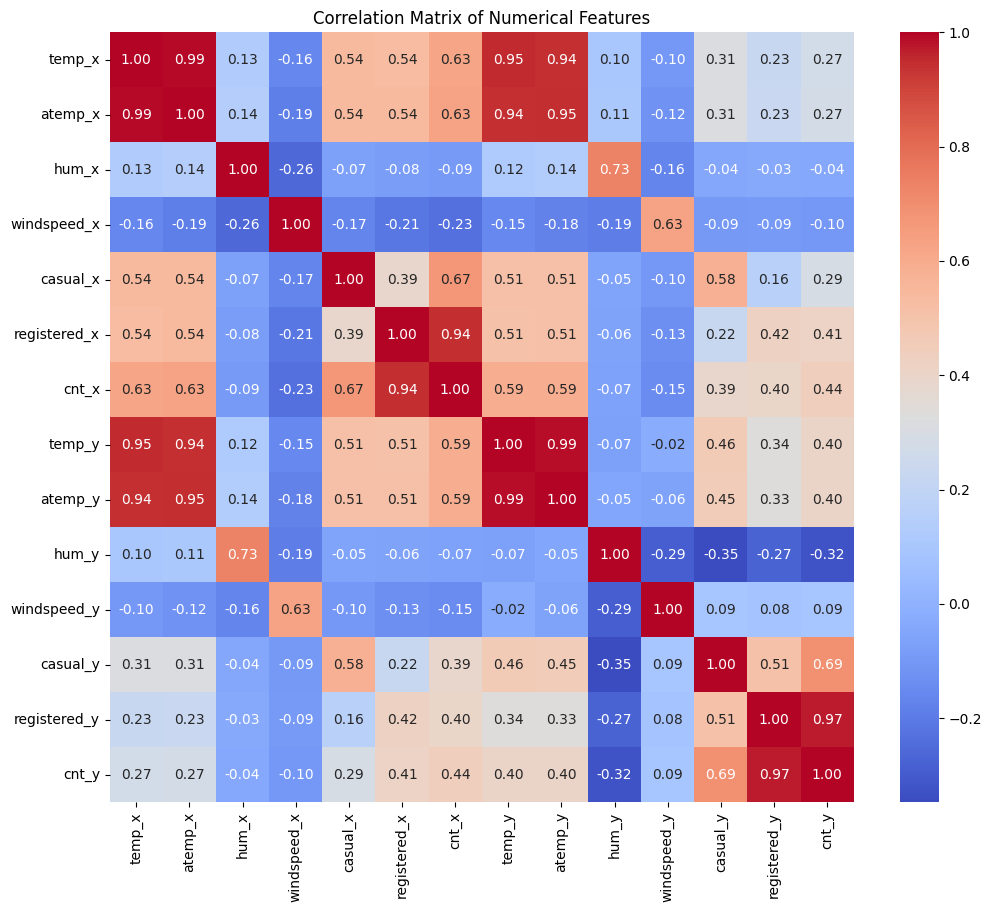

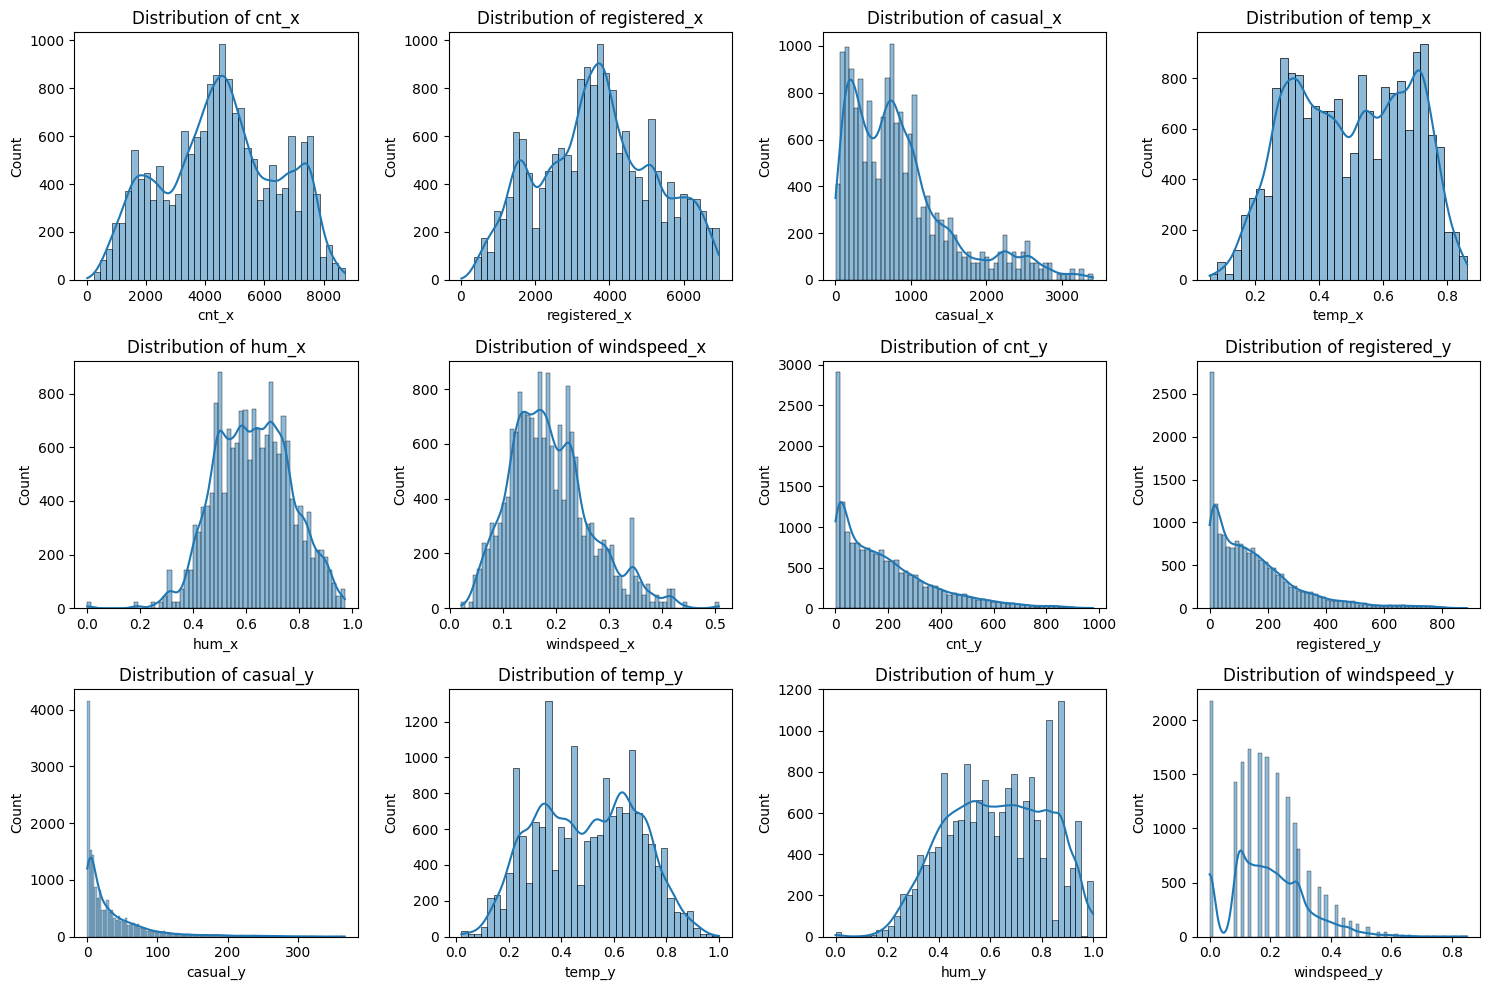

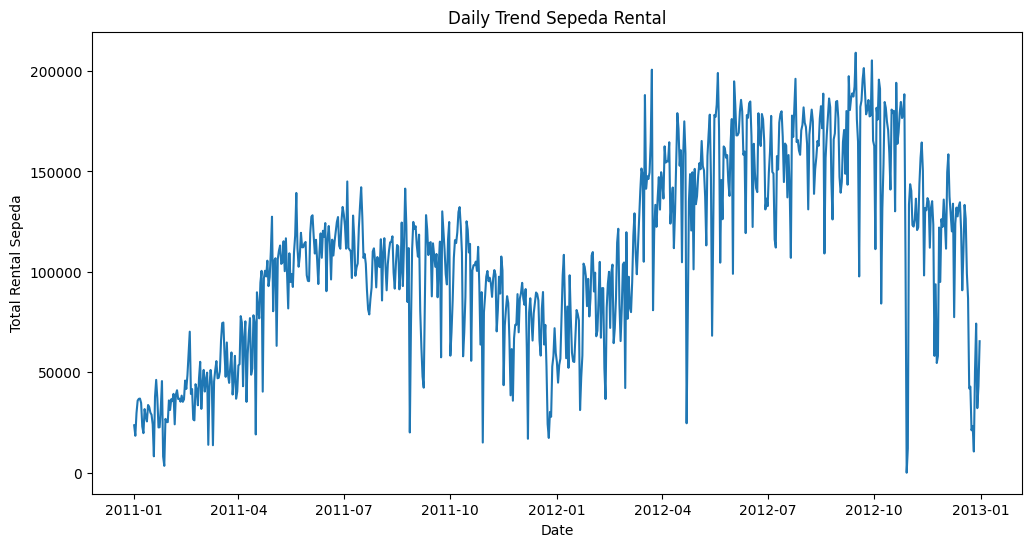

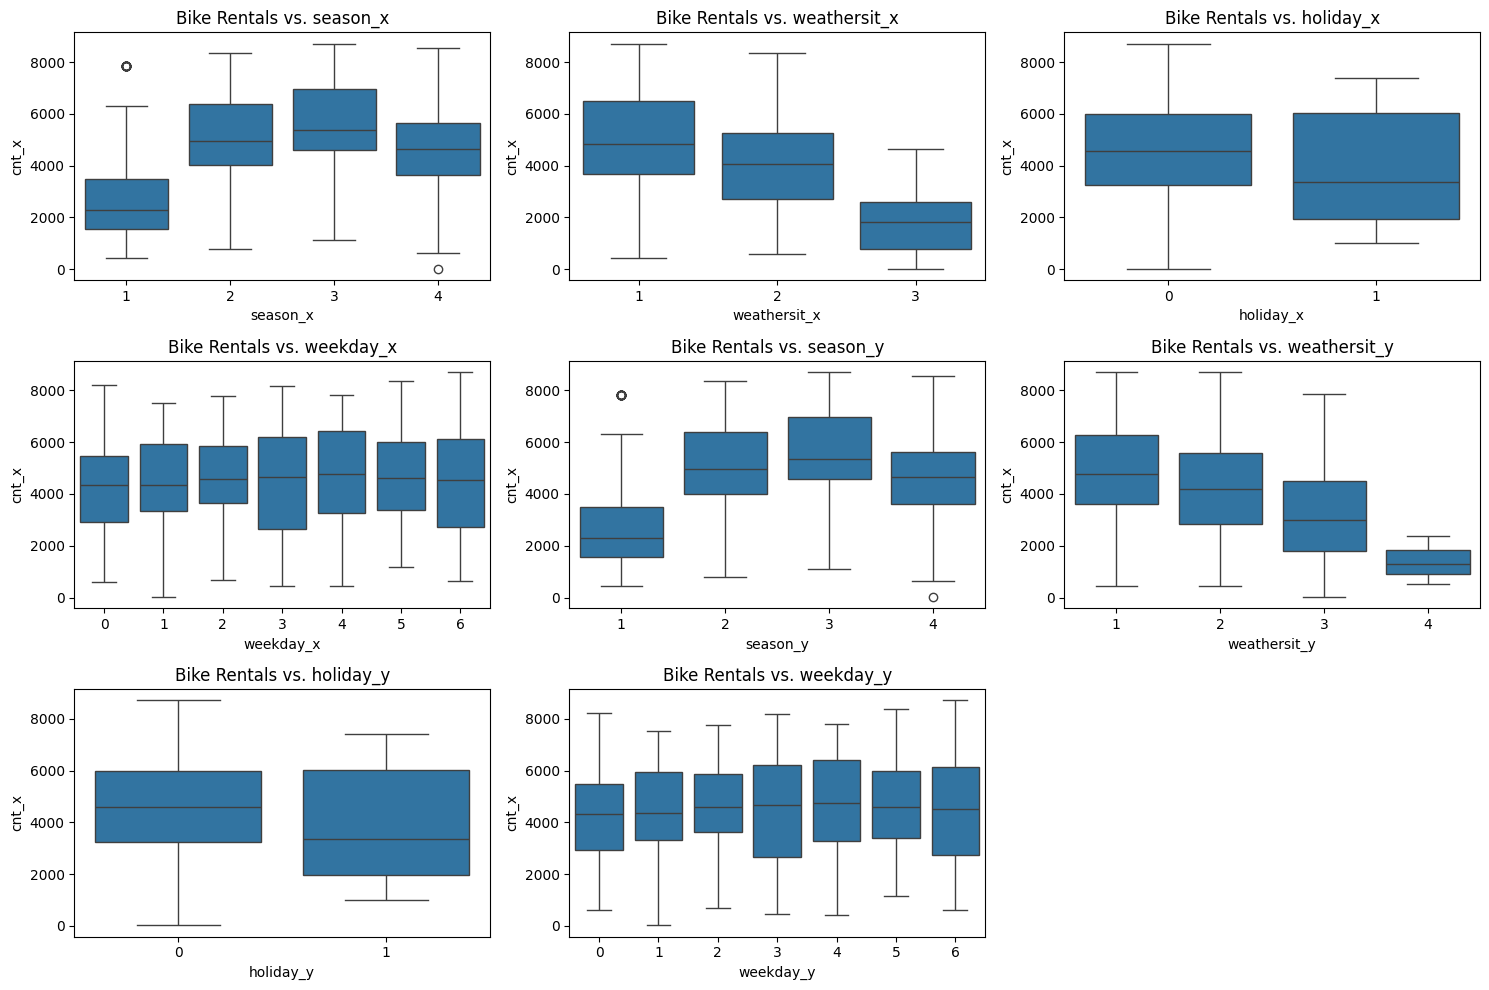

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analisis Korelasi
numerical_features = ['temp_x', 'atemp_x', 'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x', 'temp_y', 'atemp_y', 'hum_y', 'windspeed_y', 'casual_y', 'registered_y', 'cnt_y']
correlation_matrix = df_combined[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Analisis Distribusi
plt.figure(figsize=(15, 10))
for i, col in enumerate(['cnt_x', 'registered_x', 'casual_x', 'temp_x', 'hum_x', 'windspeed_x', 'cnt_y', 'registered_y', 'casual_y', 'temp_y', 'hum_y', 'windspeed_y']):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df_combined[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


# Analisis Tren
df_combined['dteday'] = pd.to_datetime(df_combined['dteday'])
df_combined_daily = df_combined.groupby('dteday')['cnt_x'].sum()
plt.figure(figsize=(12, 6))
plt.plot(df_combined_daily.index, df_combined_daily.values)
plt.xlabel('Date')
plt.ylabel('Total Rental Sepeda')
plt.title('Daily Trend Sepeda Rental')
plt.show()


# Analisis Sesuai Kondisi Variabel
categorical_cols = ['season_x', 'weathersit_x', 'holiday_x', 'weekday_x', 'season_y', 'weathersit_y', 'holiday_y', 'weekday_y']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=col, y='cnt_x', data=df_combined)
    plt.title(f'Bike Rentals vs. {col}')
plt.tight_layout()
plt.show()

**Insight:**
- Hubungan variabel ini memberikan informasi tentang analisis data yang sesuai untuk jawaban dari pertanyaan yang kita cari.
- Berdasarkan informasi tersebut dapat disimpulkan banyak variabel yang mempengaruhi jumlah rental sepeda.

## Analisis Lanjutan (Analisis RFM)

In [76]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour['recency'] = (df_hour['dteday'].max() - df_hour['dteday']).dt.days

rfm_hour = df_hour.groupby('instant').agg({
    'recency': 'min',
    'cnt': 'sum'
})
rfm_hour.rename(columns={'cnt': 'frequency'}, inplace=True)

rfm_hour['monetary'] = rfm_hour['frequency']


df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day['recency'] = (df_day['dteday'].max() - df_day['dteday']).dt.days

rfm_day = df_day.groupby('dteday').agg({
    'recency': 'min',
    'cnt': 'sum'
})
rfm_day.rename(columns={'cnt': 'frequency'}, inplace=True)

rfm_day['monetary'] = rfm_day['frequency']

print("RFM Analysis for hour_df:")
print(rfm_hour.head())

print("\nRFM Analysis for day_df:")
print(rfm_day.head())

RFM Analysis for hour_df:
         recency  frequency  monetary
instant                              
1            730         16        16
2            730         40        40
3            730         32        32
4            730         13        13
5            730          1         1

RFM Analysis for day_df:
            recency  frequency  monetary
dteday                                  
2011-01-01      730        985       985
2011-01-02      729        801       801
2011-01-03      728       1349      1349
2011-01-04      727       1562      1562
2011-01-05      726       1600      1600


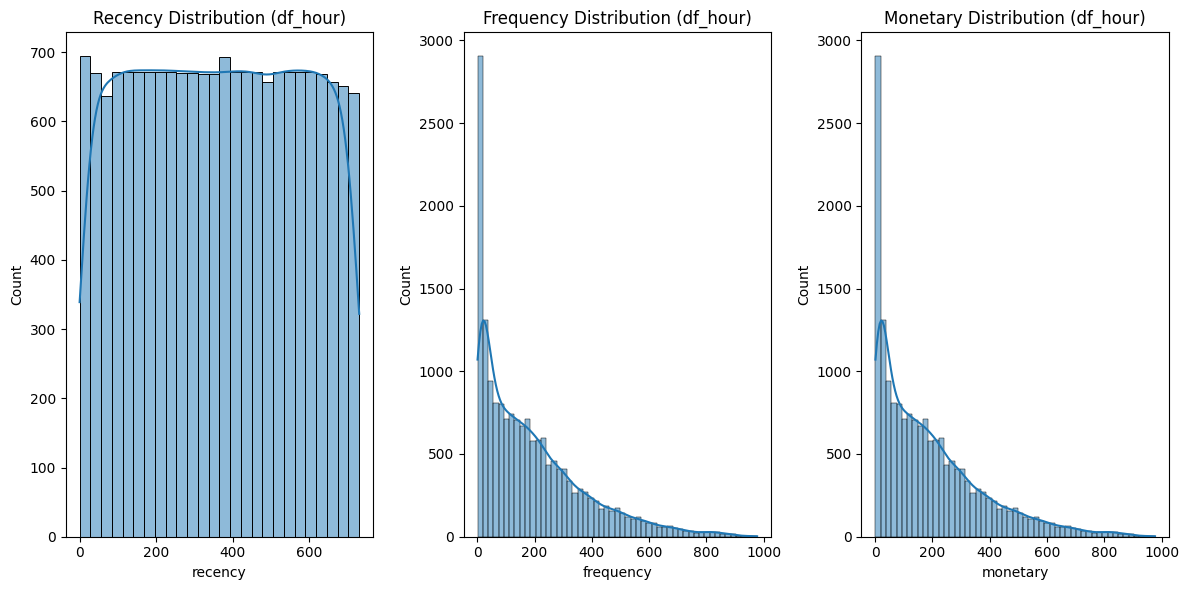

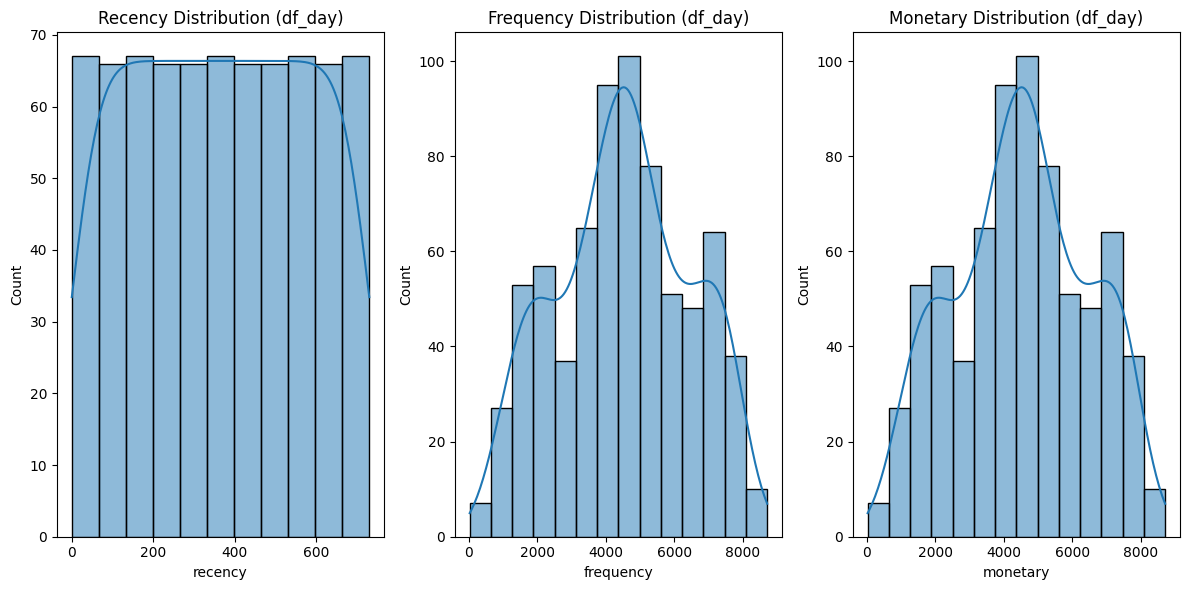

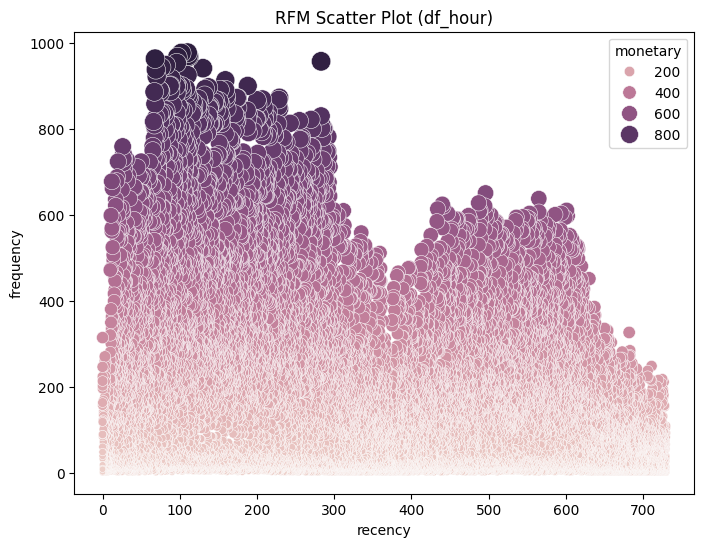

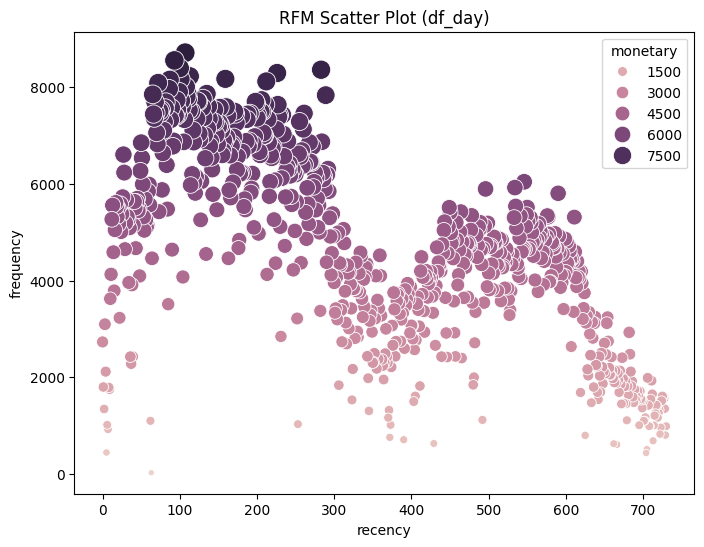

In [77]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(rfm_hour['recency'], kde=True)
plt.title('Recency Distribution (df_hour)')

plt.subplot(1, 3, 2)
sns.histplot(rfm_hour['frequency'], kde=True)
plt.title('Frequency Distribution (df_hour)')

plt.subplot(1, 3, 3)
sns.histplot(rfm_hour['monetary'], kde=True)
plt.title('Monetary Distribution (df_hour)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(rfm_day['recency'], kde=True)
plt.title('Recency Distribution (df_day)')

plt.subplot(1, 3, 2)
sns.histplot(rfm_day['frequency'], kde=True)
plt.title('Frequency Distribution (df_day)')

plt.subplot(1, 3, 3)
sns.histplot(rfm_day['monetary'], kde=True)
plt.title('Monetary Distribution (df_day)')

plt.tight_layout()
plt.show()

# Scatter plot untuk melihat hubungan antara RFM
plt.figure(figsize=(8, 6))
sns.scatterplot(x='recency', y='frequency', size='monetary', data=rfm_hour, hue='monetary', sizes=(20, 200))
plt.title('RFM Scatter Plot (df_hour)')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='recency', y='frequency', size='monetary', data=rfm_day, hue='monetary', sizes=(20, 200))
plt.title('RFM Scatter Plot (df_day)')
plt.show()

**Insight:**
- Analisis ini menunjukan kalkulasi seluruh data berdasarkan Recency,Frequency
dan Monetary. yang memberikan hasil analisis yang konkrit dan memberikan gambaran rasio penyewa dengan kondisi yang menyebabkan penyewa sepeda melonjak atau menurun dari dataset yang diberikan.

## Conclusion
1. Bagaimana tren umum penyewaan sepeda dari waktu ke waktu?
   - Kesipulan:
   - Tren rental sepeda pada waktu ke waktu mengalami peingkatan. Pada pertengahan tahun 2011 dan pertengahan tahun 2012 terjadi lonjakan yang signifikan, akan tetapi pada setiap awal tahun mengalami penurunan. Ini dipengaruhi beberapa faktor, seperti musim, cuaca, dan waktu kerja juga.

2. Bagaimana penyewaan sepeda bervariasi menurut jam dalam sehari?
   - Kesimpulan:
   - Berdasarkan grafik, penyewaan sepeda dalam sehari meningkat pada jam-jam tertentu di pagi hari sekitar jam 7 - 9 pagi, pengguna sepeda sampai 400, dan melonjak sampai hampir 500 di waktu sore hari jam 17.00. Ini membuktikan penyewa sepeda sering merental di pagi dan sore hari.
   
3. Apa dampak cuaca terhadap penyewaan sepeda?
   - Kesimpulan:
   - Berdasarkan data diatas cuaca cerah meniliki jumlah penyewa sepeda lebih banyak, dan saat kondisi cuaca tidak cerah jumlah penyewa menurun. nah di bloxpot cuaca nomor 4 presentase datanya sangat kecil. Oleh sebab itu, dapat disimpulkan bahwa cuaca menjadi faktor utama juga dalam tren naik turunnya jumlah penyewaan sepeda.
4. Bagaimana penyewaan sepeda berbeda di setiap musim?
   - Kesimpulan:
   - Berdasarkan data diatas, pada musim gugur jumlah penyewaan sepeda paling banyak dibanding musim lain. ini membuktikan data tren rental sepeda sebelumnya benar, karena mengalami lonjakan di pertengahan tahun , bulan juni- November dimana ini terjadi pada musim panas dan musim gugur. Oleh karena itu, kenapa setiap musim berbeda , dikarenakan setiap musim memiliki kondisi tersendiri yang sesuai untuk menyewa sepeda, misal musim gugur saat bersepeda kita bisa menikmati daun-daun berguguran di sore hari dengan nyaman dan kondisi lainnya.

5. Apa hubungan utama antara berbagai variabel dalam kumpulan data?
   - Kesimpulan:
   - Hubungan variabel ini memberikan informasi tentang analisis data yang sesuai untuk jawaban dari pertanyaan yang kita cari. Berdasarkan informasi tersebut dapat disimpulkan banyak variabel yang mempengaruhi jumlah rental sepeda.





